# 第5章 统计图形绘制进阶：图形样式

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

## 5.1 设置坐标轴的刻度样式
坐标轴刻度由刻度标签和刻度线组成，为了设置刻度样式，需要介绍两个概念——定位器（locator）和刻度格式器（formatter）：定位器用来设置刻度线的位置，刻度格式器用来设置刻度标签的显示样式

### 5.1.1 刻度定位器和刻度格式器的使用方法

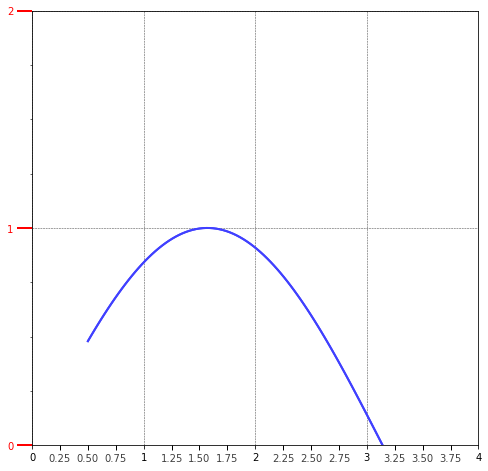

In [2]:
x = np.linspace(0.5,3.5,100)
y = np.sin(x)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

# set x y-major tick locator
ax.xaxis.set_major_locator(MultipleLocator(1.0))
ax.yaxis.set_major_locator(MultipleLocator(1.0))

# set x y-minor tick locator
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))

# set x-minor tick formatter

def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

# change the appearance of ticks and tick labels
ax.tick_params("y",which='major',length=15,width=2.0,colors='r')
ax.tick_params("x",which='minor',length=5,width=1.0,labelsize=10,labelcolor='0.25')

# set x,y axis limit
ax.set_xlim(0,4)
ax.set_ylim(0,2)

#plot subplot
ax.plot(x,y,c=(0.25,0.25,1.00),lw=2,zorder=10) # pair 0
ax.plot(x,y,c=(0.25,0.25,1.00),lw=2,zorder=10) # pair 1

# set grid
ax.grid(linestyle='-',linewidth=0.5,color='r',zorder=0) # pair 0
ax.grid(linestyle='-',linewidth=0.5,color='r',zorder=10) # pair 1
ax.grid(linestyle='--',linewidth=0.5,color='.25',zorder=0) # only one

plt.show()

AutoMinorLocator(n)将每一份主刻度线区间等分4份；
<br>MultipleLocator(x)会在坐标轴x倍的位置设置主刻度线；
<br>set_major_formatter与set_minor_formatter用于设置刻度标签的文字格式，用FuncFormatter()进行控制。


刻度样式由ax.tick_params(...)控制，其中:
<br>which用于指明是主刻度还是次刻度；length用于设置刻度长度；width设置刻度宽度；colors设置刻度及其标签的颜色，也可以分别设置颜色用color来控制刻度颜色，用labelcolor来控制标签颜色；labelsize用于控制标签大小；direction可选参数有'in'/'out'/'inout'用于设置刻度朝向；top/bottom/left/right为Bool型变量，如果为True则绘制该边的刻度；labeltop等参数与top等同样道理；pad用于设置刻度与标签之间的距离；labelrotation用于设置标签的旋转

### 5.1.2 pyplot中类似的命令
上述命令都是调用实例ax的方法进行刻度设置，在快速绘图中，可以使用plt.tick_params()同样设置

### 5.1.3 案例1 -- 刻度标签和刻度线样式的定制化

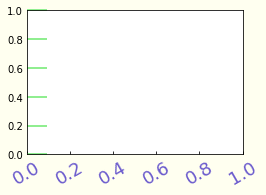

In [3]:
fig = plt.figure(facecolor=(1.0,1.0,0.9412))
ax = fig.add_axes([0.1,0.4,0.5,0.5])

ax.tick_params('both',direction='in')

for ticklabel in ax.xaxis.get_ticklabels():
    ticklabel.set_color("slateblue")
    ticklabel.set_fontsize(18)
    ticklabel.set_rotation(30)
    
for tickline in ax.yaxis.get_ticklines():
    tickline.set_color("lightgreen")
    tickline.set_markersize(20)
    tickline.set_markeredgewidth(2)
    
plt.show()

通过ax.?axis.get_ticklines获得Line2D实例，可以根据Line2D的函数对其进行修改（plt.plot的返回值也为Line2D实例）
<br> 通过ax.?axis.get_ticklabels获得Text实例，格局TexT类的函数对其进行修改

此段代码也可以用ax.tick_params(...)得到同样的效果

### 5.1.4 案例2 -- 货币和时间序列样式的刻度标签

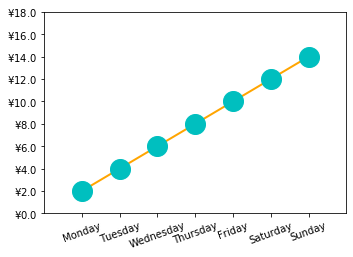

In [4]:
from calendar import month_name,day_name
from matplotlib.ticker import FormatStrFormatter

fig = plt.figure()
ax = fig.add_axes([0.2,0.2,0.7,0.7])

x = np.arange(1,8,1)
y = 2 * x

ax.plot(x,y,ls='-',lw=2,color='orange',marker='o',ms=20,mfc='c',mec='c')

# RMB ticklabel
ax.yaxis.set_major_formatter(FormatStrFormatter(r"$\yen%.1f$"))
# dayName ticklabel
plt.xticks(x,day_name[0:7],rotation=20)

ax.set_xlim(0,8)
ax.set_ylim(0,18)

plt.show()

## 5.2 添加有指示注解和无指示注解
注解主要分为两类-有指示注解和无指示注解，一般有指示的注解用axes实例下的annotate方法，无指示注解用axes实例下的text方法
### 5.2.1 有指示注解和无指示注解的添加方法

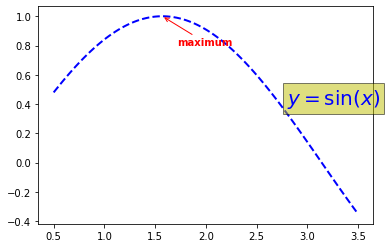

In [5]:
x = np.linspace(0.5,3.5,100)
y = np.sin(x)

fig = plt.figure()
ax = fig.add_subplot(111)

# set subplot
ax.plot(x, y, c='b', ls='--', lw=2)

ax.annotate("maximum",xy=(np.pi/2,1.0),xycoords='data',
            xytext=((np.pi/2)+0.15,0.8),textcoords='data',
            weight='bold',color='r',
            arrowprops=dict(arrowstyle="->",connectionstyle='arc3',color='r'))

ax.text(2.8,0.4,"$y=\sin(x)$",fontsize=20,color='b',
        bbox=dict(facecolor='y',alpha=0.5))

plt.show()

**annotate函数原型为ax.annotate(s,xy,xycoords,xytext,textcoords,arrowprops，\*\*kwargs)**
- s为注解的内容
- xy为被解释内容的位置；xycoords为xy的坐标系统，如果选取与所标记数据同一坐标系统则为'data'，如果axes为极坐标则为'polar'，同时还有'figure pixels','figure points','figure fraction'等参数，还可以为Artists等实例（详见：https://matplotlib.org/api/_as_gen/matplotlib.pyplot.annotate.html ）
- xytext为注释文字的位置；textcoords与xycoords用法相同
- arrowprops为指示箭头的属性，详见上述网址
- 其他的参数均为Text实例的参数

**text函数原型为ax.text(x,y,s,\*\*kwargs)**
- x,y为注释文字的位置
- s为注解的内容
- kwargs为Text实例的参数（详见：https://matplotlib.org/api/text_api.html#matplotlib.text.Text ）

### 5.2.2 案例1--圆角文本框的设置

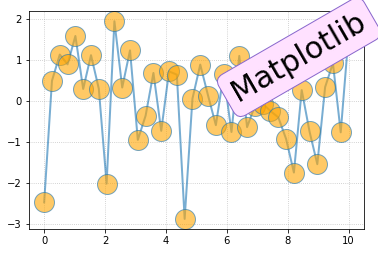

In [6]:
x = np.linspace(0.0,10,40)
y = np.random.randn(40)

plt.plot(x,y,ls='-',lw=2, marker='o',ms=20,
         mfc='orange',alpha=0.6)

plt.grid(ls=':',color='gray',alpha=0.5)

plt.text(6,0,"Matplotlib",size=30,rotation=30,
         bbox=dict(boxstyle='round',ec='#8968CD',fc='#FFE1FF'))

plt.show()

**Text**实例的属性有alpha(透明度)，backgroundcolor(背景颜色，与bbox参数冲突)，colors(文字颜色)，fontproperties/font_properties(文字属性)，fontsize/size(文字大小)，fontstyle(可选值为'normal'/'italic'/'oblique'，控制文字样式)，rotation(旋转角度)，bbox(控制fancybox的属性)

**FancyBboxPatch**与矩形Patch **Rectangle**类似，其属性有alpha，color，hatch(填充样式，可选参数有'/','\','|','-','+','x','o','O','.','\*')，edgecolor/ec，facecolor/fc，boxstyle(用于控制角的样式)



### 5.2.3 案例2 -- 文本的水印效果

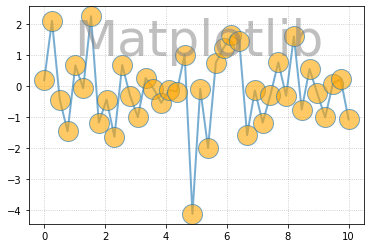

In [7]:
x = np.linspace(0.0,10,40)
y = np.random.randn(40)

plt.plot(x,y,ls='-',lw=2, marker='o',ms=20,
         mfc='orange',alpha=0.6)

plt.grid(ls=':',color='gray',alpha=0.5)

plt.text(1,1,"Matplotlib",fontsize=50,color='gray',alpha=0.5)

plt.show()

### 5.2.4 案例3 -- 圆角线框的有弧度指示的注解

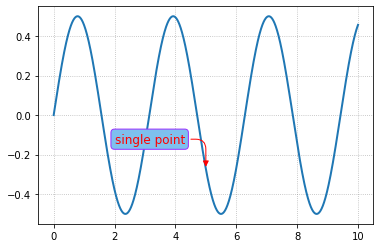

In [8]:
x = np.linspace(0,10,2000)
y = np.sin(x)*np.cos(x)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x,y,ls='-',lw=2)

bbox = dict(boxstyle='round',fc='#7EC0EE',ec='#9B30FF')
            
arrowprops = dict(arrowstyle='-|>',
                  connectionstyle='angle, angleA=0, angleB=90, rad=10',
                  color='r')

ax.annotate("single point",(5,np.sin(5)*np.cos(5)),
            xytext=(2,np.sin(3)*np.cos(3)),
            fontsize=12,color='r',
            bbox=bbox,arrowprops=arrowprops)

ax.grid(ls=':',color='gray',alpha=0.6)

plt.show()

**annotation**由一个箭头实例(FancyArrowPatch)和一个文本实例(Text)构成，Text以及FancyBboxPatch已在上面的代码中做过解释。

FancyArrowPatch的属性有：
- posA,PosB: 箭头的头、尾的坐标
- arrowstyle: 箭头的样式（如下）

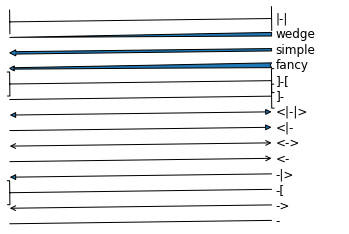

In [9]:
arrowstyles = ['-','->','-[','-|>','<-',
               '<->','<|-','<|-|>',']-',
               ']-[','fancy','simple','wedge',
               '|-|']

fig = plt.figure()
ax = fig.add_subplot(111)

count = 0 
for arrow in arrowstyles:
    ax.annotate(arrow,(0,count),xycoords='data',
                xytext=(2,count),textcoords='data',fontsize=12,
                arrowprops=dict(arrowstyle=arrow,connectionstyle='arc3'))
    count += 2
    
ax.set_xlim(0,2.5)
ax.set_ylim(0,28)

ax.axis('off')
plt.show()

- connectionstyle: 连接线的属性，内置的属性有'angle','angle3','arc','arc3',bar'。同样也可以自己设置，可选择的参数有angleA(起始点角度),angleB(终止点角度),armA(起始点长度最小值),armB(终止点长度最小值),rad(转角点路径半径),fraction(armA和armB的比例),angle(连接线的角度)

### 5.2.4 案例4 -- 有箭头指示的趋势线

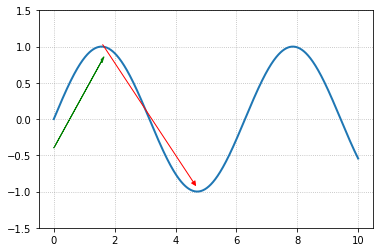

In [10]:
x = np.linspace(0,10,2000)
y = np.sin(x)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x,y,ls='-',lw=2)

ax.set_ylim(-1.5,1.5)

arrowprops = dict(arrowstyle='-|>',color='r')

ax.annotate('',(3*np.pi/2,np.sin(3*np.pi/2)+0.05),
            xytext=(np.pi/2,np.sin(np.pi/2)+0.05),
            color='r',arrowprops=arrowprops)

ax.arrow(0.0,-0.4,np.pi/2,1.2,
         head_width=0.05, head_length=0.1,
         fc='g', ec='g')

ax.grid(ls=':',color='gray',alpha=0.6)

plt.show()

除了ax.annotate之外，ax.arrow也可以生成箭头，其使用方法为
<br>ax.arrow(x,y,dx,dy,\*\*kwargs)
<br>其中x,y为箭头起始点，而dx,dy为两个轴的增量
<br>但是arrow的箭头不是一个正三角形，如果需要正三角形还是使用annotate

### 5.2.6 桑基图(Sand key)
桑基图主要用于呈现能量、物质或成本在流动过程中的转移情况

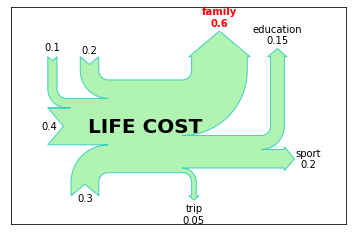

In [11]:
from matplotlib.sankey import Sankey

flows = [0.2,0.1,0.4,0.3,-0.6,-0.05,-0.15,-0.2]
labels = ['','','','','family','trip','education','sport']
orientations=[1,1,0,-1,1,-1,1,0]

sankey = Sankey()

sankey.add(flows=flows,labels=labels,orientations=orientations,
           color='c',fc='lightgreen',patchlabel='LIFE COST',
           alpha=0.7)

diagrams = sankey.finish()
diagrams[0].texts[4].set_color('r')
diagrams[0].texts[4].set_weight('bold')
diagrams[0].text.set_fontsize(20)
diagrams[0].text.set_fontweight('bold')

plt.show()

sankey通过add()和finish()方法完成桑基图的绘制工作。
<br>flows表示流出流入量(正值为流入，负值为流出)，orientations表是流量的方向(-1,0,1分别代表下方，水平，上方)

#### Sankey图用法
首先需要生成一个sankey类的实例，其初始化函数为
<br> Sankey(ax=None,scale=1.0,unit='',format='%G',gap=0.25,radius=0.1,shoulder=0.03,offset=0.15,head_angle=100,margin=0.4,tolerance=1e-06,\*\*kwargs)
<br> ax为绘制sankey图所需要的axes(默认为新生成一个新的axes); scale用于控制流量粗细的标准(尽量使得流入量总和和scale的成绩大约为1); unit为流量的单位，默认是没有; gap为上侧或下侧流量之间的间距(radius需要小于gap，否则会报错); radius为流量拐弯内圆半径; shoulder为箭头宽度(多出箭头柄的宽度); offset为文字与流量图的距离; head_angle为箭头角度(若为180则为平头); margin为sankey图与画图区域的最小距离

通过Sankey类的add函数向桑基图添加subdiagram，其函数为
<br> add(*self*, patchlabel='', flows=None, orientations=None, labels='', trunklength=1.0, pathlengths=0.25, prior=None, connect=(0, 0), rotation=0, \*\*kwargs)
<br> patchlabel为显示在中央的文字; trunklength为输入组与输出组之间的距离; pathlengths为竖直箭头的长度(即在流入之前或流出之后); prior为所要链接的之前diagram的索引; connect为链接的两个流的索引对(如果想要两个系统成为一个循环，虽然连接只能连一对，但是可以通过修改其他属性使得其成为一个循环); rotation为图形旋转的角度; \*\*kwargs的属性与PathPatch相同

通过Sankey类的finish函数返回所有的子图，通过索引获取单个子图实例，每个子图的属性有patch(桑基图轮廓线);flows(流量的数值);angles(返回每一个箭头的角度除以90的值，例如向上为1，向下为3); text为标签的Text实例; texts为单个标签所组成的Text实例列表

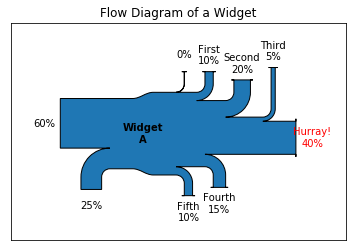

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[],
                     title="Flow Diagram of a Widget")
sankey = Sankey(ax=ax, scale=0.01, offset=0.2, head_angle=180,
                format='%.0f', unit='%')
sankey.add(flows=[25, 0, 60, -10, -20, -5, -15, -10, -40],
           labels=['', '', '', 'First', 'Second', 'Third', 'Fourth',
                   'Fifth', 'Hurray!'],
           orientations=[-1, 1, 0, 1, 1, 1, -1, -1, 0],
           pathlengths=[0.25, 0.25, 0.25, 0.25, 0.25, 0.6, 0.25, 0.25,
                        0.25],
           patchlabel="Widget\nA")
diagrams = sankey.finish()
diagrams[0].texts[-1].set_color('r')
diagrams[0].text.set_fontweight('bold')

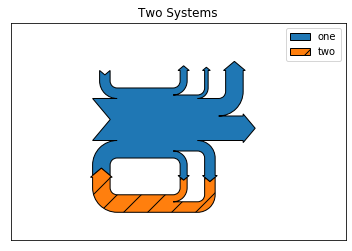

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[], title="Two Systems")

flows = [0.25, 0.15, 0.60, -0.10, -0.05, -0.25, -0.15, -0.10, -0.35]

sankey = Sankey(ax=ax, unit=None)
sankey.add(flows=flows, label='one',
           orientations=[-1, 1, 0, 1, 1, 1, -1, -1, 0])

sankey.add(flows=[-0.25, 0.15, 0.1], label='two',
           orientations=[-1, -1, -1], prior=0, connect=(0, 0))

diagrams = sankey.finish()
diagrams[-1].patch.set_hatch('/')
plt.legend()

plt.show()

初始化Sankey类时，如果unit参数为None则图中不显示流量

## 5.3 实现坐标和坐标轴标签的投影效果

### 5.3.1 实现标题和坐标轴标签的投影效果的操作方法
引入新类patheffects(路径效果)

In [14]:
import matplotlib.patheffects as pes

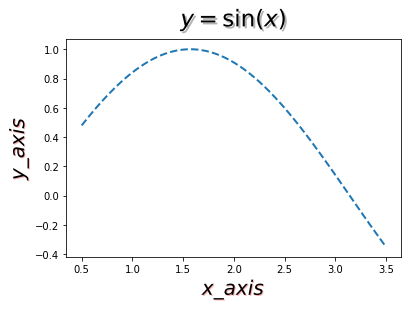

In [15]:
x = np.linspace(0.5,3.5,100)
y = np.sin(x)

fontsize = 23

plt.plot(x,y,ls='--',lw=2)

title = '$y=\sin({x})$'
xaxis_label = '$x\_axis$'
yaxis_label = '$y\_axis$'

title_text_obj = plt.title(title,fontsize=fontsize,va='bottom')
xaxis_label_text_obj = plt.xlabel(xaxis_label,fontsize=fontsize-3,alpha=1.0)
yaxis_label_text_obj = plt.ylabel(yaxis_label,fontsize=fontsize-3,alpha=1.0)

title_text_obj.set_path_effects([pes.withSimplePatchShadow()])
pe = pes.withSimplePatchShadow(offset=(1,-1),shadow_rgbFace='r',alpha=.3)
xaxis_label_text_obj.set_path_effects([pe])
yaxis_label_text_obj.set_path_effects([pe])

plt.show()

set_path_effects为基类Artists的方法，通过set_path_effects(path_effects)实现对文字、图像等对象的效果设置

withSimplePatchShadow函数原型为：
<br>**withSimplePatchShadow**(offset=(2,-2),shadow_rgbFace=None,alpha=None,rho=0.3,\*\*kwargs)
<br> offset用于设置投影内容相对文本本身的偏离距离; <br>shadow_rgbFace用于设置投影的颜色; <br>alpha为投影的透明度(取值范围0~1); <br>rho为shadow_rgbFace为None时用于设定阴影相对原文本的颜色; <br>\*\*kwargs值将传入AbstractPathEffect.\_update\_gc()

代码中set_title中的参数va(或verticalalignment)为竖直对齐方式，可选参数有'center','top','bottom','baseline',center_baseline'

### 5.3.2 案例 -- 给坐标轴标签添加文本框

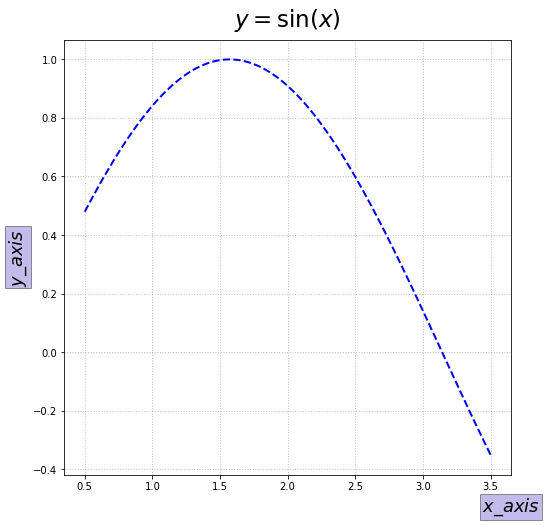

In [16]:
x = np.linspace(0.5,3.5,100)
y = np.sin(x)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

box = dict(fc='#6959CD',pad=2,alpha=0.4)
ax.plot(x, y, c='b', ls='--', lw=2)

title = '$y=\sin({x})$'
xaxis_label = '$x\_axis$'
yaxis_label = '$y\_axis$'

ax.set_xlabel(xaxis_label,fontsize=18,bbox=box)
ax.set_ylabel(yaxis_label,fontsize=18,bbox=box)
ax.set_title(title,fontsize=23,va='bottom')

ax.yaxis.set_label_coords(-0.08,0.5)
ax.xaxis.set_label_coords(1.0,-0.05)

ax.grid(ls=':',lw=1,color='gray',alpha=0.5)

plt.show()

轴坐标对象的set_label_coords方法可以设置label的位置，其中位置时相对于坐标轴系统而言，(0,0)时坐标系左下角而(0.5,0.5)时坐标系的中心，负数代表远离坐标轴。